# Aims

- build basic model as feasability for classification prediction of bad days in ED

# Objectives

- import data already processed using feature tools
- add in target feature: worst days of occupancy
- create df with roughly same variables as before

# Intentions
- build pipelines for data integration
- export as much of the heavy functions to seperate .py file

# stretch
- go back to esets and create hourly form scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

%load_ext autoreload
%autoreload 2

#import mlxtend

# import data and check basic plots look correct

In [2]:
df = pd.read_pickle('./activity.pkl')

In [3]:
df.head(2)

,COUNT(EDatt),MEAN(EDatt.admission_flag),MEAN(EDatt.age),NUM_TRUE(EDatt.arrival_mode_desc_bool),SUM(EDatt.admission_flag),SUM(EDatt.age),MAX(EDatt.age),LAST(EDatt.arrival_mode_desc_bool),LAST(EDatt.admission_flag),LAST(EDatt.pseudo_patient_number),...,LAST(EDatt.patients.NUM_TRUE(EDatt.arrival_mode_desc_bool)),LAST(EDatt.patients.SUM(EDatt.admission_flag)),LAST(EDatt.patients.SUM(EDatt.age)),LAST(EDatt.patients.MAX(EDatt.admission_flag)),LAST(EDatt.patients.LAST(EDatt.admission_flag)),LAST(EDatt.patients.LAST(EDatt.arr_date)),LAST(EDatt.patients.LAST(EDatt.age)),LAST(EDatt.patients.MONTH(first_EDatt_time)),LAST(EDatt.patients.YEAR(first_EDatt_time)),LAST(EDatt.patients.WEEKDAY(first_EDatt_time))
arr_date,,,,,,,,,,,,,,,,,,,,,
2009-04-01,227,0.343612,35.933921,70.0,78,8157.0,93.0,False,1,5.251513e+11,...,2.0,3.0,129.0,1.0,0.0,2016-05-06,36.0,4.0,2009.0,2.0
2009-04-02,247,0.344130,38.028340,94.0,85,9393.0,92.0,False,0,3.840439e+10,...,0.0,0.0,36.0,0.0,0.0,2009-04-02,36.0,4.0,2009.0,3.0


#### cut data to what is complete!

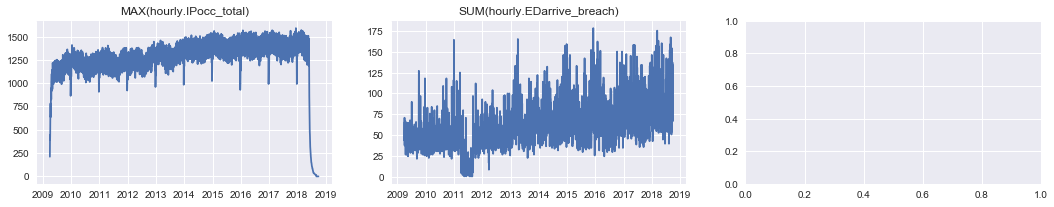

In [4]:
from utils import plot_raw_timeseries_for_basic_vis_check
col_list = ['MAX(hourly.IPocc_total)','SUM(hourly.EDarrive_breach)']
plot_raw_timeseries_for_basic_vis_check(df,col_list)

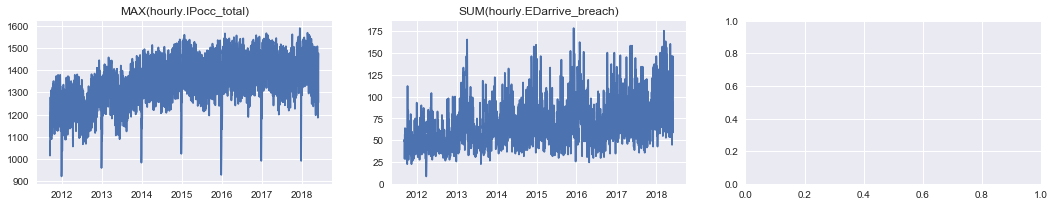

In [5]:
#### cut to what data i have at the moment
df = df[pd.datetime(2011,9,10):pd.datetime(2018,6,1)]#['ED_attendances'].plot() # to remove the part with spurious ED data, advantages to have more data to not do this.
plot_raw_timeseries_for_basic_vis_check(df,col_list)

# create target column

- creating events to classify from timeseries
- this notebook attempts to use a running average to decide classification target 

In [6]:
df.head(2)

,COUNT(EDatt),MEAN(EDatt.admission_flag),MEAN(EDatt.age),NUM_TRUE(EDatt.arrival_mode_desc_bool),SUM(EDatt.admission_flag),SUM(EDatt.age),MAX(EDatt.age),LAST(EDatt.arrival_mode_desc_bool),LAST(EDatt.admission_flag),LAST(EDatt.pseudo_patient_number),...,LAST(EDatt.patients.NUM_TRUE(EDatt.arrival_mode_desc_bool)),LAST(EDatt.patients.SUM(EDatt.admission_flag)),LAST(EDatt.patients.SUM(EDatt.age)),LAST(EDatt.patients.MAX(EDatt.admission_flag)),LAST(EDatt.patients.LAST(EDatt.admission_flag)),LAST(EDatt.patients.LAST(EDatt.arr_date)),LAST(EDatt.patients.LAST(EDatt.age)),LAST(EDatt.patients.MONTH(first_EDatt_time)),LAST(EDatt.patients.YEAR(first_EDatt_time)),LAST(EDatt.patients.WEEKDAY(first_EDatt_time))
arr_date,,,,,,,,,,,,,,,,,,,,,
2011-09-10,260,0.353846,38.284615,101.0,92,9954.0,97.0,False,1,9.294943e+11,...,1.0,1.0,10.0,1.0,0.0,2017-02-07,7.0,10.0,2010.0,5.0
2011-09-11,294,0.360544,39.061224,105.0,106,11484.0,95.0,False,1,4.072421e+11,...,2.0,5.0,430.0,1.0,1.0,2017-02-05,65.0,7.0,2011.0,1.0


In [7]:
df['MAX(hourly.IPocc_total)'].head()

arr_date
2011-09-10    1078.0
2011-09-11    1015.0
2011-09-12    1165.0
2011-09-13    1208.0
2011-09-14    1219.0
Name: MAX(hourly.IPocc_total), dtype: float64

Proportion of points classed as state 1: 0.153


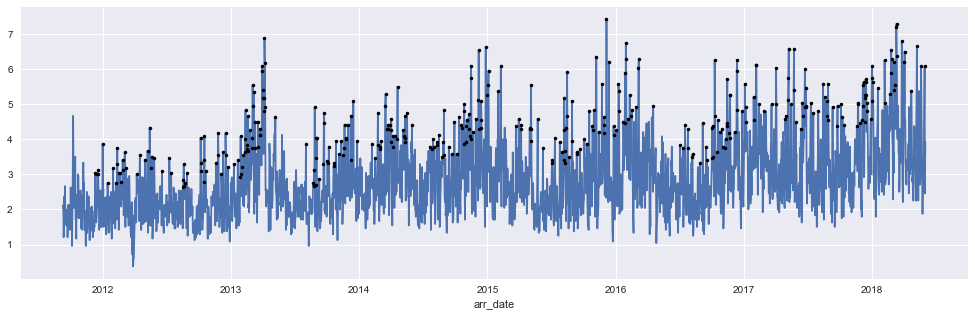

In [8]:
from utils import create_binary_class_label_rollingSTD

target_col = 'MEAN(hourly.EDarrive_breach)'
df = create_binary_class_label_rollingSTD(df,target_col)

# Engineer additional features

Proportion of(non-elec / elec +non-elec )IP occupancy at final hour of day.

In [9]:
df['IPocc_ratio_LAST'] = df['LAST(hourly.IPocc_NonElective)']/df['LAST(hourly.IPocc_elec_nonelec)']

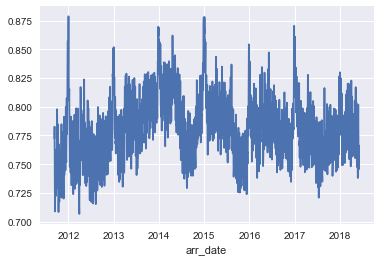

In [10]:
df.IPocc_ratio_LAST.plot()

IPocc percenrtage

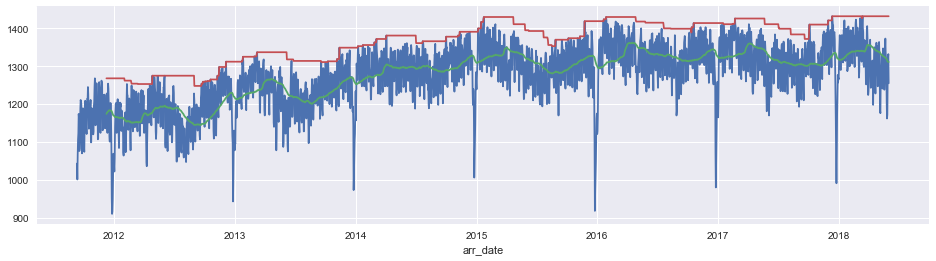

In [11]:
interval = 90
df['MAX(hourly.IPocc_elec_nonelec)'].plot(figsize=(16,4))
df['MAX(hourly.IPocc_elec_nonelec)'].rolling(interval).mean().plot()
df['MAX(hourly.IPocc_elec_nonelec)'].rolling(interval).max().plot()

In [12]:
df['IPbed_cap_synth'] = df['MAX(hourly.IPocc_elec_nonelec)'].rolling(interval).max()

In [13]:
df['IPbed_occupancy'] = df['MAX(hourly.IPocc_elec_nonelec)']/df.IPbed_cap_synth

adm - dis IP

In [14]:
df['IPadm_minus_dis_elec_nonelec'] = df['SUM(hourly.IPadm_elec_nonelec)'] - df['SUM(hourly.IPdis_elec_nonelec)']

# Make lagged features & offset target feature

- lagged features
- target feature moved forward by 1 day

In [15]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

In [16]:
from utils import find_feature_types

num_attribs,cat_attribs,bin_attribs,typesdf = find_feature_types(df)

Number of cols:  168
Numerical:  150
Catagorical:  4
Binary:  4
Total used:  158

WARNING UNUSED COLUMNS:
LAST(hourly.IPocc_Day_Case) , float64
LAST(hourly.IPadm_daycase) , float64
LAST(hourly.IPadm_elective) , float64
LAST(hourly.IPdis_nonelec) , float64
LAST(hourly.IPdis_elective) , float64
LAST(hourly.IPdis_elec_nonelec) , float64
LAST(EDatt.patients.gender) , object
LAST(EDatt.patients.MAX(EDatt.admission_flag)) , float64
LAST(EDatt.patients.LAST(EDatt.admission_flag)) , float64
LAST(EDatt.patients.LAST(EDatt.arr_date)) , datetime64[ns]


#### autofind the numerical, binary, cat features

In [17]:
from utils import LaggedFeaturesAll, OffsetTargetVar

In [18]:
feature_changes = {'lag':[1,2,3,4,5,6,7],
                  'sum':[7],
                  'mean':[7,30]}


target_changes = {'target_class':[1]}

# create piptleine to create lags in data
feature_prep = Pipeline([
   # ('LaggedFeature',LaggedFeaturesAll(feature_changes,num_attribs)),
    ('OffsetTarget',OffsetTargetVar(target_changes)),
])

In [19]:
feature_prep.fit_transform(df)
#df.dropna(inplace=True)

In [20]:
for i in num_attribs:
    print(i)

COUNT(EDatt)
MEAN(EDatt.admission_flag)
MEAN(EDatt.age)
NUM_TRUE(EDatt.arrival_mode_desc_bool)
SUM(EDatt.admission_flag)
SUM(EDatt.age)
MAX(EDatt.age)
LAST(EDatt.pseudo_patient_number)
LAST(EDatt.age)
MEAN(hourly.EDocc_nonadmit)
MEAN(hourly.EDocc_admit)
MEAN(hourly.EDocc_total)
MEAN(hourly.EDocc_awaitingadm)
MEAN(hourly.EDocc_nonbreach)
MEAN(hourly.EDocc_breach)
MEAN(hourly.IPocc_NonElective)
MEAN(hourly.IPocc_Day_Case)
MEAN(hourly.IPocc_Elective)
MEAN(hourly.IPocc_total)
MEAN(hourly.IPocc_elec_nonelec)
MEAN(hourly.IPadm)
MEAN(hourly.IPadm_nonelec)
MEAN(hourly.IPadm_elective)
MEAN(hourly.IPdis)
MEAN(hourly.IPdis_nonelec)
MEAN(hourly.IPdis_daycase)
MEAN(hourly.IPdis_elective)
MEAN(hourly.IPadm_elec_nonelec)
MEAN(hourly.IPdis_elec_nonelec)
MEAN(hourly.EDarrive)
MEAN(hourly.EDarrive_breach)
MEAN(hourly.EDarrive_adm)
MEAN(hourly.EDdepart)
MEAN(hourly.EDdepart_breach)
MEAN(hourly.EDdepart_adm)
SUM(hourly.EDocc_nonadmit)
SUM(hourly.EDocc_admit)
SUM(hourly.EDocc_total)
SUM(hourly.EDocc_awaiti

In [21]:
df.shape

(2457, 169)

In [22]:
df.dropna(inplace=True) # get rid of missing vlaues from lagging process
#df.reset_index(inplace=True,drop=True)

## make callander cols 0- move to entity set creation

df.reset_index(inplace=True)

df['arr_date_dow'] = df['arr_date'].apply(lambda x : x.weekday())

# pipeline for data prep

#### get data into x,y, test,train

In [23]:
df.reset_index(inplace=True)

In [24]:
target_col

'MEAN(hourly.EDarrive_breach)'

DATA POINTS:
training:  1637
validation:  365
testing:  365


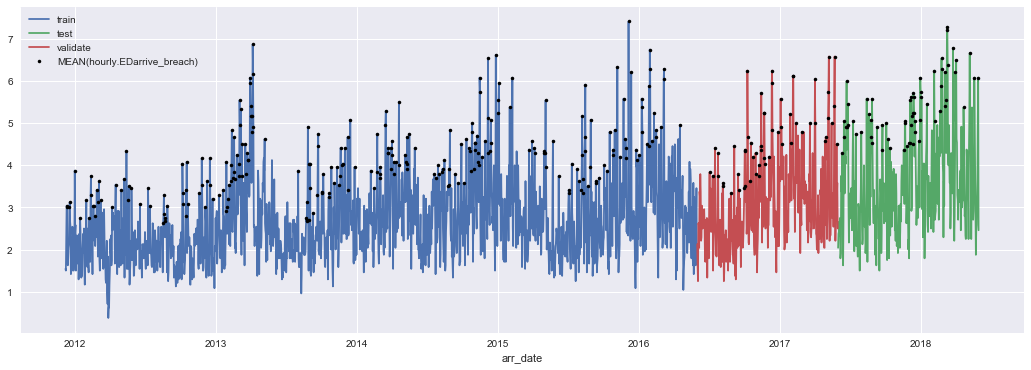

In [25]:
from utils import make_test_train_splits

X_test,X_valid,X_train,X_train_valid,y_test,y_valid,y_train,y_train_valid = make_test_train_splits(df,target_col,'target_class','target_class_lagN1',365,365)

cats = ['a','bj','jjc']
remove = ['1','a','jjc']
for i in cats:
    if i not in remove:
        print(i)

cats + remove

#### pipeline: feature selection and scaling

In [26]:
num_attribs,cat_attribs,bin_attribs,typesdf = find_feature_types(df)

Number of cols:  170
Numerical:  150
Catagorical:  4
Binary:  4
Total used:  158

WARNING UNUSED COLUMNS:
arr_date , datetime64[ns]
LAST(hourly.IPocc_Day_Case) , float64
LAST(hourly.IPadm_daycase) , float64
LAST(hourly.IPadm_elective) , float64
LAST(hourly.IPdis_nonelec) , float64
LAST(hourly.IPdis_elective) , float64
LAST(hourly.IPdis_elec_nonelec) , float64
LAST(EDatt.patients.gender) , object
LAST(EDatt.patients.MAX(EDatt.admission_flag)) , float64
LAST(EDatt.patients.LAST(EDatt.admission_flag)) , float64
LAST(EDatt.patients.LAST(EDatt.arr_date)) , datetime64[ns]
target_class_lagN1 , float64


In [27]:
#### a sklearn transformer class to select attributes of interest for each group
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [28]:
#### a sklearn transformer class to select attributes of interest for each group
from sklearn.base import BaseEstimator, TransformerMixin

class MakeBooleanAnInteger(BaseEstimator,TransformerMixin):
    def __init__(self):
        return
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X*1

In [29]:
# version 19.2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
#from sklearn.preprocessing import OrdinalEncoder

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [31]:
print(X_train.shape)

X_new = SelectKBest(f_classif, k=50).fit_transform(X_train[num_attribs], y_train)
print(X_new.shape)

(1637, 169)
(1637, 50)


In [32]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('feature_filter',SelectKBest(f_classif,k=70)),
    ('imputer',Imputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('imputer',Imputer(strategy='most_frequent')),
    ('OneHot_encoder',OneHotEncoder(sparse=False))
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_attribs)),
    ('imputer',Imputer(strategy='most_frequent')),
    ('boolean_conversion',MakeBooleanAnInteger()),
    #('encoding',LabelEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
   ('cat_pipeline',cat_pipeline),
   ('bin_pipeline',bin_pipeline) 
])

In [33]:
X_trainT = full_pipeline.fit_transform(X_train,y_train)

In [34]:
X_trainT = full_pipeline.fit_transform(X_train,y_train)

X_train_validT = full_pipeline.transform(X_train_valid)
X_validT = full_pipeline.transform(X_valid)
X_testT = full_pipeline.transform(X_test)

In [35]:
X_trainT.shape

(1637, 112)

from utils import DataFrameRebuild

X_trainT = DataFrameRebuild(df, X_trainT,num_attribs,cat_attribs,bin_attribs)
X_testT = DataFrameRebuild(df, X_testT,num_attribs,cat_attribs,bin_attribs)

In [36]:
#X_trainT.drop('target_class',axis=1,inplace=True)

#### a sklearn transformer class to create column headers and replace 
# pipelined data into into df.

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameRebuilder(BaseEstimator,TransformerMixin):
    def __init__(self,column_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        # get numpy array
        return X[self.attribute_names].values

There can be no folding on a timeseries so just split into a test and train set now

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(XtrainT, ytrain):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

# DIM reduction testing

# basic model build

In [37]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [43]:
from utils import plot_model_perf

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=1,solver='liblinear',class_weight ='balanced')
lgr.fit(X_trainT,y_train)
plot_model_perf(y_test,X_testT,lgr,'Validation Set')

In [44]:
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid,Xdata,ydata,plot_label):
    """does gridsearch for model and plots result from """
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=5,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
    
    if hasattr(model, 'predict_proba'):
        ydata_predDF = model.predict_proba(Xdata)[:,1] 
    else:
        ydata_predDF = model.decision_function(Xdata)# warning, some model dont have DF
        print('No predicit_proba, DF used instead')
    
    #### get threshold + ROC curve data    
    precisions, recalls, thresholds = precision_recall_curve(ydata,ydata_predDF)
    fpr,tpr,thresholds_ROC = roc_curve(ydata,ydata_predDF)
    
    #### create plot
    fig,ax = plt.subplots(1,3,figsize=(15,4))
    fig.suptitle(plot_label)
    
    #def plot_precision_recall_vs_threshold(precisions, recalls,thresholds):
    ax[0].plot(thresholds,precisions[:-1],'b--',label='Prec')
    ax[0].plot(thresholds,recalls[:-1],'g-',label='Reca')
    ax[0].set_xlabel('Threshold')
    ax[0].set_ylabel('')
    ax[0].legend(frameon=True,loc='center right')
    ax[0].set_ylim([0,1])
    
    ax[1].plot(recalls[:-1],precisions[:-1],'g-') #,label='Reca')
    ax[1].set_ylabel('Precision')
    ax[1].set_xlabel('Recall')
    ax[1].legend(frameon=True,loc='center right')
    ax[1].set_ylim([0,1])
    
    ax[2].plot(fpr,tpr)
    ax[2].plot([0,1],[0,1],'k--')
    ax[2].set_xlabel('F positive rate')
    ax[2].set_ylabel('T positve rate')
    
    #print model perforamnce stats
    y_pred = model.predict(Xdata)
    print()
    print('CV EVALUATION')
    print('accuracy: ',accuracy_score(ydata,y_pred).round(2))
    print('precision: ', precision_score(ydata,y_pred).round(2))
    print('recall: ', recall_score(ydata,y_pred).round(2))
    
    return(grid_search)
    

In [49]:
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid,Xdata,ydata,plot_label):
    """does gridsearch for model and plots result from """
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=5,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
    plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

# Model build + tune

for i in X_trainT.columns:
    print(i)

### regressions

CV MODEL RESULTS
{'C': 0.1}
   mean_test_score  mean_train_score
0         0.432385          0.512217
accuracy:  0.76
precision:  0.37
recall:  0.78


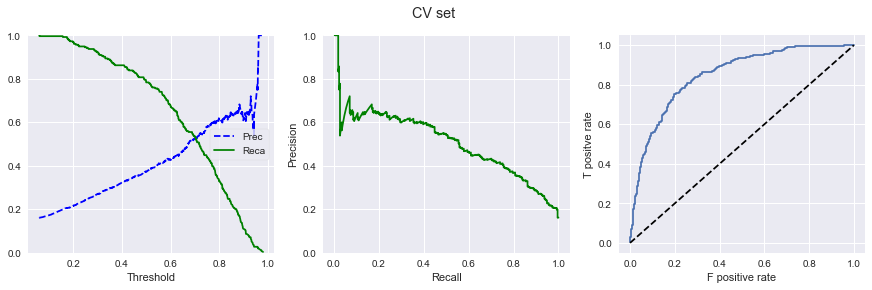

In [50]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

grid = {'C':[0.5,1,10,1000]}
grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

accuracy:  0.77
precision:  0.38
recall:  0.75


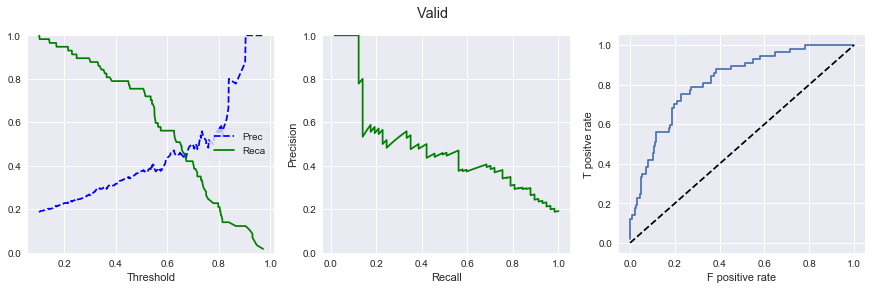

In [53]:
plot_model_perf(y_valid,X_validT,lgr,'Valid')

accuracy:  0.71
precision:  0.33
recall:  0.65


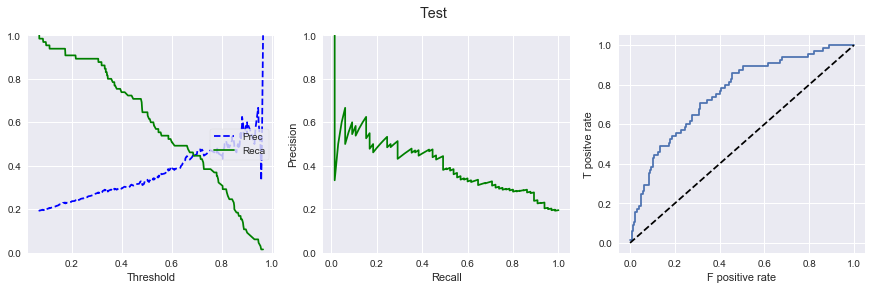

In [54]:
plot_model_perf(y_test,X_testT,lgr,'Test')

coefs = pd.DataFrame(data=lgr.coef_.reshape(-1,1),index=X_trainT.columns,columns=['coef'])
coefs = (np.sqrt(coefs**2)).sort_values(by='coef')
list(coefs[coefs.coef < 0.15].index)

coefs[coefs.coef < 0.15].shape

plot_model_perf(y_test,X_testT,lgr,'Test')

In [55]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'median_absolute_error', 'mean_absolute_error', 'mean_squared_error', 'accuracy', 'roc_auc', 'average_precision', 'log_loss', 'neg_log_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

CV MODEL RESULTS
{'C': 0.2}
   mean_test_score  mean_train_score
0         0.445385          0.503295
accuracy:  0.75
precision:  0.36
recall:  0.79


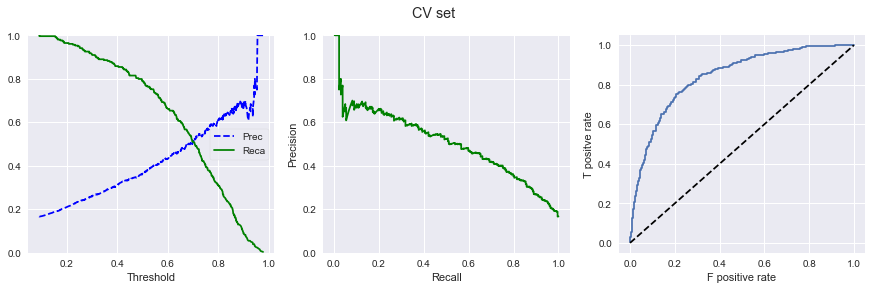

In [57]:

lasso = LogisticRegression(penalty = 'l1', solver='liblinear',class_weight ='balanced')

grid = {'C':[0.2,1]}


grid_search = find_best_model(lasso,grid,X_trainT,y_train,'CV set')
lasso = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'alpha': 30}
   mean_test_score  mean_train_score
6         0.438561          0.517945
No predicit_proba, DF used instead
accuracy:  0.76
precision:  0.37
recall:  0.8


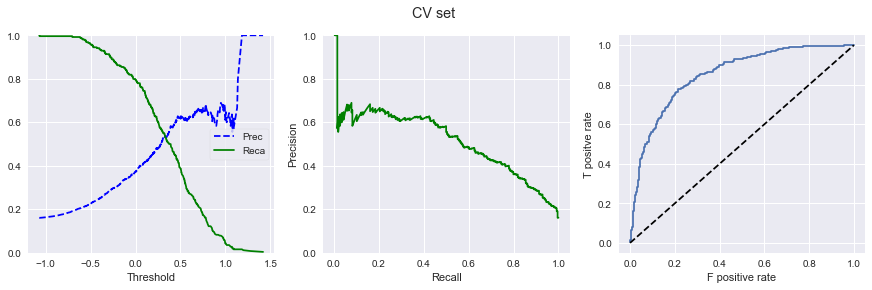

In [60]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(class_weight ='balanced')

grid = {'alpha':[0.2,0.3,0.5,1,5,10,30,50,70,100,1000,2000,5000]}


grid_search = find_best_model(ridge,grid,X_trainT,y_train,'CV set')
ridge = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

No predicit_proba, DF used instead
accuracy:  0.7
precision:  0.32
recall:  0.58


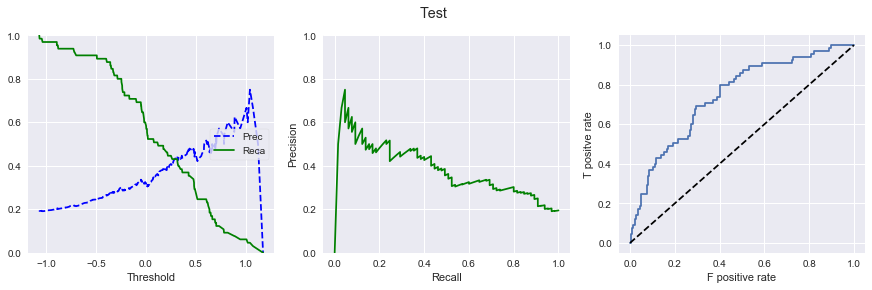

In [61]:
#grid_search.fit(X_trainT,y_train)
plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
break

### SVM

CV MODEL RESULTS
{'C': 1, 'gamma': 'auto'}
   mean_test_score  mean_train_score
1         0.406795          0.542539
accuracy:  0.78
precision:  0.4
recall:  0.83


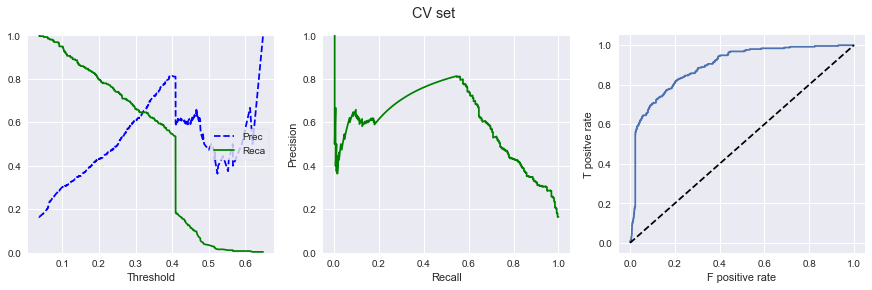

In [62]:
from sklearn.svm import SVC

svc = SVC(class_weight ='balanced',kernel='rbf',probability=True)

grid = {'C':[0.5,1,5,50,70,1000],
       'gamma':['auto']}


grid_search = find_best_model(svc,grid,X_trainT,y_train,'CV set')
svc = grid_search.best_estimator_


#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

accuracy:  0.65
precision:  0.28
recall:  0.62


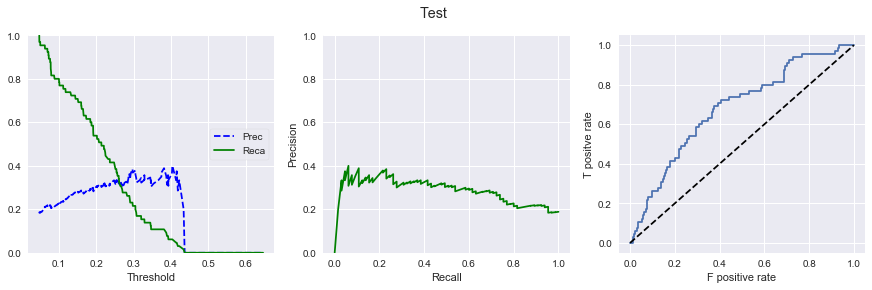

In [63]:
#grid_search.fit(X_trainT,y_train)
plot_model_perf(y_test,X_testT,svc,'Test')

In [ ]:
from sklearn.svm import SVC

svc = SVC(class_weight ='balanced',kernel='rbf',probability=True)

grid = {'C':[0.5,1,5,50,70,1000],
       'gamma':['auto']}


grid_search = find_best_model(svc,grid,X_trainT,y_train,'CV set')
svc = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
from sklearn.svm import SVC

svc_lin = SVC(class_weight ='balanced',kernel='linear',probability=True)

grid = {'C':[0.2,0.5,1,5],
       'gamma':['auto']}


grid_search = find_best_model(svc_lin,grid,X_trainT,y_train,'CV set')
svc_lin = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
from sklearn.svm import SVC

svc_lin = SVC(class_weight ='balanced',kernel='linear',probability=True)

grid = {'C':[0.2,0.5,1,5],
       'gamma':['auto']}


grid_search = find_best_model(svc_lin,grid,X_trainT,y_train,'CV set')
svc_lin = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
plot_model_perf(y_test,X_testT,svc_lin,'Test')

### Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf = BaggingClassifier(
        RidgeClassifier(class_weight='balanced'),n_jobs=-1
    )


grid = {"bootstrap" : ["True"],
              "base_estimator__alpha": [0.2,0.3,0.5,1,5]
             }


grid_search = find_best_model(bag_clf,grid,X_trainT,y_train,'CV set')
bag_clf = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True"],
        "n_estimators":[10,50,100],
              "base_estimator__max_depth": [3],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf,grid,X_trainT,y_train,'CV set')
bag_clf = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [ ]:
plot_model_perf(y_test,X_testT,bag_clf,'Test')

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf2 = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True"],
        "n_estimators":[10,50,100],
              "base_estimator__max_depth": [3],
        "max_samples": [150],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf2,grid,X_trainT,y_train,'CV set')
bag_clf2 = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf2 = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True", "False"],
        "n_estimators":[10,50,100,200,400,600,800],
              "base_estimator__max_depth": [2],
        "max_samples": [50,150,250],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf2,grid,X_trainT,y_train,'CV set')
bag_clf2 = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf3 = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True"],
        "n_estimators":[1000],
              "base_estimator__max_depth": [1,2],
        "max_samples": [10,20,30,50],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf3,grid,X_trainT,y_train,'CV set')
bag_clf3 = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



bag_clf2 = BaggingClassifier(
        DecisionTreeClassifier(class_weight='balanced'),bootstrap=True,n_jobs=-1
    )


grid = {"bootstrap" : ["True", "False"],
        "n_estimators":[1000],
              "base_estimator__max_depth": [1,2],
        "max_samples": [10,20,30,50],
        "base_estimator__splitter":['random']
             }


grid_search = find_best_model(bag_clf2,grid,X_trainT,y_train,'CV set')
bag_clf2 = grid_search.best_estimator_

#grid_search.fit(X_trainT,y_train)
#plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

## test ensemble

In [ ]:
from civismlext.stacking import StackedClassifier

rng = np.random.RandomState(17)
est_list = [
    ('lgr',lgr),
    ('svm_linear',svc_lin),
    ('bag',bag_clf),
    ('metalr',LogisticRegression(penalty = 'l1', solver='liblinear',class_weight='balanced'))
]

In [ ]:
sm = StackedClassifier(est_list,n_jobs=2,cv=5)

In [ ]:
sm.fit(X_train_validT, y_train_valid)

In [ ]:
X_validT = full_pipeline.transform(X_valid)

In [ ]:
X_train_validT = full_pipeline.transform(X_train_valid)

In [ ]:
sm.meta_estimator.coef_

In [ ]:
plot_model_perf(y_train,X_trainT,sm,'train')

In [ ]:
plot_model_perf(y_valid,X_validT,sm,'valid')

In [ ]:
plot_model_perf(y_test,X_testT,sm,'test')

In [ ]:
plot_model_perf(y_test,X_testT,sm,'test')

NOtes:
    - made little differnece having the extra validation data for training

In [ ]:
param_grid = {
    'metalr__C': [0.5,1]
}

grid = GridSearchCV(sm,param_grid,scoring='roc_auc',cv=5)

In [ ]:
grid.fit(X_train_validT,y_train_valid)

In [ ]:
plot_model_perf(y_train_valid,X_train_validT,grid.best_estimator_,'train')

In [ ]:
plot_model_perf(y_test,X_testT,grid.best_estimator_,'test')

In [ ]:
grid.best_estimator_.get_params()

In [ ]:
sm.meta_estimator

In [ ]:
grid.best_estimator_.meta_estimator.coef_

In [ ]:
sm.meta_estimator.

#### more complex meta estimator

In [ ]:
from civismlext.stacking import StackedClassifier
from sklearn.svm import SVC

rng = np.random.RandomState(17)
est_list = [
    ('lgr',lgr),
    ('svm_linear',svc_lin),
    ('bag',bag_clf),
    ('metalr',SVC(kernel='linear',class_weight='balanced'))
]

In [ ]:
sm = StackedClassifier(est_list,n_jobs=-1,cv=5)

In [ ]:
param_grid = {
    'metalr__C': [0.5,1,5]
}

grid = GridSearchCV(sm,param_grid,scoring='roc_auc',cv=5)

In [ ]:
grid.fit(X_train_validT, y_train_valid)

In [ ]:
grid.best_estimator_.meta_estimator.coef_

In [ ]:
plot_model_perf(y_train_valid,X_train_validT,grid.best_estimator_,'train')

In [ ]:
plot_model_perf(y_test,X_testT,grid.best_estimator_,'test')

# Dev

In [ ]:
break

#### Visualise some of the target variable

def display_target_split(data,column):
    "make table with split of target values for each value in column selected"
    result = data.groupby([column,'flag_prediction']).count()['YEAR(first_EDatt_time)'].unstack()
    row_sum = data.groupby([column,'flag_prediction']).count()['YEAR(first_EDatt_time)'].unstack().sum(axis=1)
    result = result.divide(row_sum,axis='rows').round(2)
    return(result)

display_target_split(X_train,'arr_date_dow')

display_target_split(X_train,'MONTH(first_EDatt_time)')

display_target_split(X_valid,'MONTH(first_EDatt_time)')

display_target_split(X_test,'MONTH(first_EDatt_time)')

# ensemble model implemetnation with mlxtend

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1,n_estimators=100)
clf3 = GaussianNB()
lr = LogisticRegression(solver='liblinear')
sclf = StackingClassifier(classifiers=[clf2, clf3,lgr,lasso,svc,svc_lin,bag_clf,bag_clf2],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_trainT, y_train, 
                                              cv=5, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

In [ ]:
params = {'meta-logisticregression__C': [0.5,1,5,10,50,100,1000,5000]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True,
                   scoring='roc_auc')
grid.fit(X_validT, y_valid)

In [ ]:
grid.best_params_

In [ ]:
plot_model_perf(y_valid,X_validT,grid.best_estimator_,'train')

In [ ]:
plot_model_perf(y_test,X_testT,grid.best_estimator_,'test')

In [ ]:
break

if trianed on same set as first layer of models:

In [ ]:
params = {'meta-logisticregression__C': [0.5,1,5,10,50,100,1000,5000]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_trainT, y_train)

In [ ]:
grid.best_params_

In [ ]:
plot_model_perf(y_train,X_trainT,grid.best_estimator_,'train')

In [ ]:
plot_model_perf(y_test,X_testT,grid.best_estimator_,'test')

In [ ]:
grid = {'C':[0.5,1,5,10,30,50,70,100,1000,2000,5000]}
grid = {'C':[1,5,10]}


grid_search = find_best_model(sclf,grid,X_trainT,y_train,'CV set')
lgr = grid_search.best_estimator_

In [ ]:
X_testT.shape

In [ ]:
X_trainT.shape

In [ ]:
sclf.fit(X_trainT,y_train)
plot_model_perf(y_test,X_testT,sclf,'train')

In [ ]:
plot_model_perf(y_train,X_trainT,grid_search.best_estimator_,'train')

### voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators =[('lgr',lgr),('lasso',lasso),('SVM2',svc_lin),('bag1',bag_clf),('bag2',bag_clf2)],
    voting='soft'
)

voting_clf.fit(X_trainT,y_train)

plot_model_perf(y_test,X_testT,voting_clf,'Validation')

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators =[('lgr',lgr),('lasso',lasso),('SVM2',svc_lin),('bag1',bag_clf),('bag2',bag_clf2)],
    voting='soft'
)

voting_clf.fit(X_trainT,y_train)

plot_model_perf(y_train,X_trainT,voting_clf,'Validation')

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators =[('lgr',lgr),('lasso',lasso),('SVM',svc),('SVM2',svc_lin),('bag1',bag_clf),('bag2',bag_clf2)],
    voting='hard'
)

voting_clf.fit(X_trainT,y_train)

def results_print(ydata,Xdata,model,label):
    y_pred = model.predict(Xdata)
    print('accuracy: ',accuracy_score(ydata,y_pred).round(2))
    print('precision: ', precision_score(ydata,y_pred).round(2))
    print('recall: ', recall_score(ydata,y_pred).round(2))
    
results_print(y_test,X_testT,voting_clf,'Validation')

# Analayse errors

In [ ]:
estimator_list = [('lgr',lgr),('lasso',lasso),('SVM',svc),('SVM_lin',svc_lin),('bag1',bag_clf),('bag2',bag_clf2),('vote',voting_clf)]

pred_results = pd.DataFrame(data = y_train.values, index=X_train.index, columns=['y_test'])

for name,model in estimator_list:
    print(name)
    y_train_pred = cross_val_predict(model,X_trainT,y_train,cv=5,n_jobs=-1,method='predict_proba')[:,1]
    y_train_pred = pd.DataFrame(y_train_pred, index = X_train.index, columns=['y_pred_' + name])
    pred_results = pred_results.merge(y_train_pred,right_index=True,left_index=True) # merge model results
    
    
pred_results = pred_results.merge(X_train,right_index=True,left_index=True) # merge 

In [ ]:
pred_results.head()

pred_cols = ['y_test','y_pred_lgr','y_pred_lasso','y_pred_SVM','y_pred_SVM_lin','y_pred_bag1','y_pred_bag2','y_pred_vote']

In [ ]:
pred_cols = {'y_test':0.5,'y_pred_lgr':0.9,'y_pred_lasso':0.9,'y_pred_SVM_lin':0.6,'y_pred_bag1':0.75,
             'y_pred_bag2':0.5,'y_pred_vote':0.65}

In [ ]:
pred_cols

In [ ]:
for name in pred_cols:
    col =  name # 'y_pred_' +
    print([name])
    thresh = pred_cols[name]
    print(pred_results[pred_results[name] > thresh][col].count())
    pred_results[name + '_CLASS'] = pred_results[pred_results[name] > thresh][name].astype('bool').astype('int')

In [ ]:
pred_results.groupby('y_test').sum()

In [ ]:
missed = pred_results.query('y_test == 1')[['y_pred_lgr_CLASS','y_pred_lasso_CLASS',
                                  'y_pred_SVM_lin_CLASS','y_pred_bag1_CLASS','y_pred_bag2_CLASS','y_pred_vote_CLASS']].isnull().sum(axis=1)

In [ ]:
pred_results.query('y_test == 1')[['y_pred_lgr_CLASS','y_pred_lasso_CLASS',
                                  'y_pred_SVM_lin_CLASS','y_pred_bag1_CLASS','y_pred_bag2_CLASS','y_pred_vote_CLASS']].isnull().sum(axis=1).value_counts()

In [ ]:
missed.head(10)

In [ ]:
missed = missed[missed == 6]

In [ ]:
missed.head()

In [ ]:
pred_results['y_pred_MISSED'] = 0
pred_results.loc[missed.index,'y_pred_MISSED'] = 1

In [ ]:
pred_results.y_pred_MISSED.sum()

In [ ]:
X_train.head()

In [ ]:
pred_results['y_pred_MISSED'].sum()

In [ ]:
pred_results['flag_prediction'].sum()

In [ ]:
pred_col = 'y_pred_MISSED'
pred_results[pred_col + '_lag1'] = pred_results[pred_col].shift(1)

fig2, ax = plt.subplots(figsize=(18,6))
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col + '_lag1'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='ob')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')

plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'SVM_lin' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')

plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'lgr' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))

pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'bag1' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))

pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'bag2' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))

pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'vote' + '_CLASS'
fig2, ax = plt.subplots(figsize=(18,6))

pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
plt.legend(loc='upper left')


In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'vote'


fig2, ax = plt.subplots(figsize=(18,6))
#### plot lines
#X_train.plot(x="dt_date", y=target_col, ax=ax, label="train")
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
#X_test.plot(x="dt_date", y=target_col, ax=ax, label="test")


pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
#plt.axvline(pd.to_datetime(str(df.loc[validate_range].period.values[0])), c='green', ls='--', lw=1)
# plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
plt.legend(loc='upper left')

# plt.savefig('images/svm-split.png');

In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'bag2'


fig2, ax = plt.subplots(figsize=(18,6))
#### plot lines
#X_train.plot(x="dt_date", y=target_col, ax=ax, label="train")
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
#X_test.plot(x="dt_date", y=target_col, ax=ax, label="test")


pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
#plt.axvline(pd.to_datetime(str(df.loc[validate_range].period.values[0])), c='green', ls='--', lw=1)
# plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
plt.legend(loc='upper left')

# plt.savefig('images/svm-split.png');

In [ ]:
correct_col = 'y_test'
pred_col = 'y_pred_' + 'bag1'


fig2, ax = plt.subplots(figsize=(18,6))
#### plot lines
#X_train.plot(x="dt_date", y=target_col, ax=ax, label="train")
pred_results.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
#X_test.plot(x="dt_date", y=target_col, ax=ax, label="test")


pred_results[pred_results[pred_col] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
pred_results[pred_results['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
#plt.axvline(pd.to_datetime(str(df.loc[validate_range].period.values[0])), c='green', ls='--', lw=1)
# plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
plt.legend(loc='upper left')

# plt.savefig('images/svm-split.png');

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf_tree = BaggingClassifier(
        DecisionTreeClassifier(),n_estimators=600,
    max_samples=300,bootstrap=True,n_jobs=-1
    )

In [ ]:
bag_clf_tree.fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,bag_clf_tree,'Validation')

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf_svc = BaggingClassifier(
        SVC(),n_estimators=600,
    max_samples=100,bootstrap=True,n_jobs=-1
    )

In [ ]:
bag_clf_svc.fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,bag_clf_svc,'Validation')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier

AB_clf_svc = AdaBoostClassifier(
        SVC(C=1),n_estimators=400,algorithm='SAMME'
)

In [ ]:
AB_clf_svc.fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,AB_clf_svc,'Validation')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier

AB_clf_dt = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2),
    n_estimators=200,algorithm='SAMME.R'
)

In [ ]:
AB_clf_dt.fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,AB_clf_dt,'Validation')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier

AB_clf_dt = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2),
    n_estimators=200,algorithm='SAMME.R'
)

In [ ]:
AB_clf_dt.fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,AB_clf_dt,'Validation')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier

AB_clf_dt = AdaBoostClassifier(
        DecisionTreeClassifier(),
    n_estimators=200,algorithm='SAMME.R'
)


grid = {'max_depth':[1,2,3,4],
        }

grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "base_estimator__max_depth": [1, 2,3]
             }


grid_search = GridSearchCV(AB_clf_dt,grid,scoring='balanced_accuracy',cv=5,n_jobs=-1)

grid_search.fit(X_trainT,y_train)

plot_model_perf(y_valid,X_validT,grid_search.best_estimator_,'Validation')

In [ ]:
grid = {'alpha':[0.1,0.3,0.5,0.7,1,2,5,10,100,1000],
        'class_weight':[{0:1,1:0.5},{0:1,1:0.7},{0:1,1:1.0},{0:1,1:1.2},{0:1,1:1.5},{0:1,1:1.8},{0:1,1:2.0},
                        {0:1,1:2.5},{0:1,1:3.0},{0:1,1:5.0},{0:1,1:10}]}

grid_search = GridSearchCV(ridge,grid,scoring='balanced_accuracy',cv=5)

grid_search.fit(X_trainT,y_train)

plot_model_perf(y_valid,X_validT,grid_search.best_estimator_,'Validation')

In [ ]:
grid_search.best_estimator_

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.SCORERS

In [ ]:
break

# model weights

# model weights

In [ ]:
lgr.coef_

In [ ]:
ridge.coef_

# look at potential error in decision rate

In [ ]:
y_valid_pred = ridge.predict(X_validT)

cm = confusion_matrix(y_valid,y_valid_pred)

cm_prob = cm/cm.sum()

In [ ]:
cm

In [ ]:
cm_prob

In [ ]:
print(classification_report(y_valid,y_valid_pred))

In [ ]:
print(classification_report(y_valid,y_valid_pred))

In [ ]:
time = 365
print('Over a window of {} days'.format(time))
print('Decisions made: {}'.format((time*sum(cm_prob[:,1])).round(1)))
print('Correct: {}'.format((time*cm_prob[1,1]).round(1)))
print('False alarms: {}'.format((time*cm_prob[0,1]).round(1)))
print('Missed events: {}'.format((time*cm_prob[1,0]).round(1)))

In [ ]:
time = 365
print('Over a window of {} days'.format(time))
print('Decisions made: {}'.format((time*sum(cm_prob[:,1])).round(1)))
print('Correct: {}'.format((time*cm_prob[1,1]).round(1)))
print('False alarms: {}'.format((time*cm_prob[0,1]).round(1)))
print('Missed events: {}'.format((time*cm_prob[1,0]).round(1)))

In [ ]:
y_valid_predDF = lgr.decision_function(X_validT)

y_valid_pred.shape

In [ ]:
temp = pd.DataFrame([y_valid.values,y_valid_predDF],index=['flag','DF']).T #.pivot() #.groupby([0]).sum()
#temp.groupby([1,0])
#temp.pivot(columns=[0],values=[1])
#temp.hist()

In [ ]:
df_valid_pred = pd.DataFrame(data=y_valid_pred,index=X_valid.index,columns=['y_pred'])

In [ ]:
X_valid2 = X_valid.merge(df_valid_pred,how='left',right_index=True,left_index=True).copy()

In [ ]:
fig2, ax = plt.subplots(figsize=(18,6))
#### plot lines
#X_train.plot(x="dt_date", y=target_col, ax=ax, label="train")
X_valid2.plot(x="dt_date", y=target_col, ax=ax, label="validate",style='g')
#X_test.plot(x="dt_date", y=target_col, ax=ax, label="test")


X_valid2[X_valid2['y_pred'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='or')
X_valid2[X_valid2['flag_prediction'] == 1].plot(x='dt_date',y=target_col,ax=ax,style='.k')
#plt.axvline(pd.to_datetime(str(df.loc[validate_range].period.values[0])), c='green', ls='--', lw=1)
# plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
plt.legend(loc='upper left')

# plt.savefig('images/svm-split.png');

In [ ]:
temp.pivot(values='DF',columns='flag').plot.hist(bins=60,alpha=0.5)

# investigate errors in model

In [ ]:
result = pd.DataFrame(data = [y_valid.values,y_valid_pred],columns=y_valid.index,index=['y_true','y_pred']).T
result.head()

In [ ]:
result = result.merge(df,how='left',right_index=True,left_index=True)

In [ ]:
result.head(1)

In [ ]:
result.groupby(['y_true','y_pred']).count()['dt_year'].unstack()

In [ ]:
result.groupby(['dt_month','y_true','y_pred']).count()['dt_year'].unstack()

In [ ]:
result.groupby(['dt_dayofweek','y_true','y_pred']).count()['dt_year'].unstack()

# Weighted models

In [ ]:
from sklearn.metrics import accuracy_score

for weight in [0.9,1,1.5,2,5,10]:
    from sklearn.linear_model import LogisticRegression
    lgr2 = LogisticRegression(penalty='l2',class_weight={0:1,1:weight}).fit(X_trainT,y_train)
    y_valid_pred = lgr2.predict(X_validT)
    print('weight', weight)
    print('accuracy: ',accuracy_score(y_valid,y_valid_pred))
    print('precision: ', precision_score(y_valid,y_valid_pred))
    print('recall: ', recall_score(y_valid,y_valid_pred))

# Other models

'Lasso' is impleemtned using l1 penalisation in Logistic Regression function.
- apparently Lasso can be unpredictable when p >> n

from sklearn.linear_model import ElasticNet
ElasticNet()

In [ ]:
from sklearn.metrics import accuracy_score

for value in [0.1,1,5,10,50,100]:
    from sklearn.linear_model import LogisticRegression
    lasso = LogisticRegression(penalty='l1',C=value,class_weight={0: 1, 1: 2.5}).fit(X_trainT,y_train)
    y_valid_pred = lasso.predict(X_validT)
    print('C', value)
    print('accuracy: ',accuracy_score(y_valid,y_valid_pred))
    print('precision: ', precision_score(y_valid,y_valid_pred))
    print('recall: ', recall_score(y_valid,y_valid_pred))

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score

In [ ]:
grid = {'C':[0.1,0.3,0.5,0.7,1,2,5,10,100,1000],
        'class_weight':[{0:1,1:0.5},{0:1,1:0.7},{0:1,1:1.0},{0:1,1:1.2},{0:1,1:1.5},{0:1,1:1.8},{0:1,1:2.0},
                        {0:1,1:2.5},{0:1,1:3.0},{0:1,1:5.0},{0:1,1:10}]}
best_score = 0

for g in ParameterGrid(grid):
    lgr.set_params(**g)
    lgr.fit(X_trainT,y_train)
    y_valid_pred = lgr.predict(X_validT)
    # save if best
    score =  f1_score(y_valid,y_valid_pred)
    #print(score)
    
    if score > best_score:
        best_score = score
        best_grid = g

print( "Best Score: %0.5f" % best_score )
print( "Grid:", best_grid)

#print "OOB: %0.5f" % best_score 
#print "Grid:", best_grid

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=0.3,solver='liblinear',class_weight={0:1,1:2.5})
lgr.fit(X_train_validT,y_train_valid)
plot_model_perf(y_test,X_testT,lgr,'Validation Set')

In [ ]:
X_testT = full_pipeline.transform(X_test)
X_train_validT = full_pipeline.transform(X_train_valid)

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()

grid = {'alpha':[0.1,0.3,0.5,0.7,1,2,5,10,50,80,100,150,1000],
        'class_weight':[{0:1,1:0.5},{0:1,1:0.7},{0:1,1:1.0},{0:1,1:1.2},{0:1,1:1.5},{0:1,1:1.8},{0:1,1:2.0},
                        {0:1,1:2.5},{0:1,1:3.0},{0:1,1:5.0},{0:1,1:10}]}
best_score = 0

for g in ParameterGrid(grid):
    ridge.set_params(**g)
    ridge.fit(X_trainT,y_train)
    y_valid_pred = ridge.predict(X_validT)
    # save if best
    score =  f1_score(y_valid,y_valid_pred)
    #print(score)
    
    if score > best_score:
        best_score = score
        best_grid = g

print( "Best Score: %0.5f" % best_score )
print( "Grid:", best_grid)

#print "OOB: %0.5f" % best_score 
#print "Grid:", best_grid

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha=100,class_weight={0: 1, 1: 2.5}).fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,ridge,'Valida')

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

grid = {'C':[0.1,0.3,0.5,0.7,1,2,5],
        'class_weight':[{0:1,1:0.5},{0:1,1:0.7},{0:1,1:1.0},{0:1,1:1.2},{0:1,1:1.5},{0:1,1:1.8},{0:1,1:2.0},
                        {0:1,1:2.5},{0:1,1:3.0},{0:1,1:5.0},{0:1,1:10}]}
best_score = 0

for g in ParameterGrid(grid):
    svc.set_params(**g)
    svc.fit(X_trainT,y_train)
    y_valid_pred = svc.predict(X_validT)
    # save if best
    score =  f1_score(y_valid,y_valid_pred)
    #print(score)
    
    if score > best_score:
        best_score = score
        best_grid = g

print( "Best Score: %0.5f" % best_score )
print( "Grid:", best_grid)

#print "OOB: %0.5f" % best_score 
#print "Grid:", best_grid

In [ ]:
from sklearn.svm import SVC
ridge = SVC(C=0.1,class_weight={0: 1, 1: 2.5},).fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,ridge,'Valida')

In [ ]:
plot_model_perf(y_valid,X_validT,lgr,'Validation Set')

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha=0.1).fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,ridge,'Valida')

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1,kernel='linear').fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,svc,'Valida')

In [ ]:
from sklearn.model_selection import Gr

precisions, recalls, thresholds = precision_recall_curve(y_valid,y_valid_predDF)

def plot_precision_recall_vs_threshold(precisions, recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Prec')
    plt.plot(thresholds,recalls[:-1],'g-',label='Reca')
    plt.xlabel('Threshold')
    plt.legend(frameon=True,loc='center right')
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

# precisions, recalls, thresholds = precision_recall_curve(trainY,y_train_pred)

def plot_precision_vs_recall(precisions, recalls,thresholds):
    #plt.plot(thresholds,precisions[:-1],'b--',label='Prec')
    plt.plot(recalls[:-1],precisions[:-1],'g-') #,label='Reca')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend(frameon=True,loc='center right')
    plt.ylim([0,1])
    
plot_precision_vs_recall(precisions,recalls,thresholds)


fpr,tpr,thresholds = roc_curve(y_valid,y_valid_predDF)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('F positive rate')
    plt.ylabel('T positve rate')
    
    
plot_roc_curve(fpr,tpr)

def plot_model_threshold_info():
    plt.subplots(1,3)
    return
    
plot_model_threshold_info()

df.head()

# search other models

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score

def disp_scores(scores_list):
    #print(scores_list)
    print('CV score: {} (STD: {})'.format(np.mean(scores_list).round(3), np.std(scores_list).round(3)))
    #print('Mean: ', )
    #print('Std: ', np.std(scores_list).round(3))

from sklearn.metrics import f1_score

y_train.value_counts()

svm1 = SVC(gamma='auto')
svm2 = SVC(gamma='auto',kernel='linear')
svm3 = SVC(gamma='auto',kernel='sigmoid')
svm4 = SVC(gamma='auto',kernel='poly')
ridge = RidgeClassifier(alpha=0.5)
rfor = RandomForestClassifier(n_estimators = 10)

models = [svm1,svm2,svm3,svm4,ridge,rfor]

def test_basic_model(model):
    """function to eval basic models"""
    #### print model info
    print(model)
    
    #### train and test on all data
    model.fit(X_trainT,y_train)
    model_pred = model.predict(X_trainT)
    print('All train:' , f1_score(model_pred,y_train).round(3) )
    
    #### cv training and testing
    scores_model = cross_val_score(model,X_trainT,y_train,cv=3,scoring='f1')
    disp_scores(scores_model)
    print()
    return

for i in models:
    test_basic_model(i)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(XtrainT, ytrain):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [ ]:
X_testT = full_pipeline.transform(X_test)

In [ ]:
ridge = RidgeClassifier(alpha=0.1).fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,ridge,'Valida')

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron().fit(X_trainT,y_train)
plot_model_perf(y_valid,X_validT,perceptron,'Valida')

# Dev

In [ ]:
break

In [ ]:
sgh.data.HOURLY